## 4.1 Imports

In [265]:
import pandas as pd
from sklearn import tree
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,plot_confusion_matrix,f1_score,accuracy_score as acc
from sklearn.model_selection import ParameterGrid,RandomizedSearchCV,PredefinedSplit,GridSearchCV,learning_curve
from imblearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

plt.rcParams['figure.figsize'] = [10,6]

## 4.2 Load The Training And Test Data


In [156]:
train = pd.read_csv('../data/training_step3.csv')
val = pd.read_csv('../data/validation_step3.csv')
test = pd.read_csv('../data/test_step3.csv')

In [157]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]

X_val = val.iloc[:,:-1]
y_val = val.iloc[:,-1]

X_test = test.iloc[:,:-1]
y_test= test.iloc[:,-1]

## Decision Tree Model

### Basic Decision Tree Model


In [158]:
#fit a decision tree model
decision_tree = tree.DecisionTreeClassifier(max_depth = 10,random_state= 42)
decision_tree.fit(X_train,y_train)
pred_y_train = decision_tree.predict(X_train)
print(classification_report(y_train,pred_y_train))

              precision    recall  f1-score   support

           1       0.80      0.78      0.79    135578
           2       0.81      0.86      0.84    181312
           3       0.79      0.82      0.81     22882
           4       0.83      0.67      0.74      1759
           5       0.77      0.35      0.48      6075
           6       0.67      0.45      0.54     11115
           7       0.88      0.76      0.82     13126

    accuracy                           0.81    371847
   macro avg       0.79      0.67      0.72    371847
weighted avg       0.80      0.81      0.80    371847



In [159]:
pred_y_val = decision_tree.predict(X_val)
print(classification_report(y_val,pred_y_val))

              precision    recall  f1-score   support

           1       0.79      0.77      0.78     33894
           2       0.80      0.86      0.83     45328
           3       0.78      0.82      0.80      5721
           4       0.81      0.65      0.72       439
           5       0.76      0.33      0.46      1519
           6       0.65      0.43      0.52      2779
           7       0.88      0.76      0.81      3282

    accuracy                           0.80     92962
   macro avg       0.78      0.66      0.70     92962
weighted avg       0.80      0.80      0.79     92962



The basic decision tree with max depth 10 is underfitting because the scores on both training set are very close but not satisfying. The recall scores on cover type 5 and 6 are only 0.33 and 0.43, so the decision tree cannot effectively identify them from others. But compared to 0.04 and 0.28 of the baseline model (logistic regression), the decision tree has improved a lot. Meanwhile, the accuracy, weighted average precision, recall, f1-score are 8% higher respectivley. The macro average precision, recall and f1-score are  15%, 14% and 16% higher.


### Hyperparameter Tuning For The Decision Tree Model

In [ ]:

for g in ParameterGrid(params):
    decision_tree.set_params(**g)
    decision_tree.fit(X_train, y_train)  
    pred_y_train = decision_tree.predict(X_train)
    pred_y_val = decision_tree.predict(X_val)
    
    #macro f1 scores
    f1_score_train.append(f1_score(y_train, pred_y_train,average = 'macro'))
    f1_score_val.append(f1_score(y_val, pred_y_val,average = 'macro'))
    
    #accuracy scores
    acc_score_train.append(acc(y_train, pred_y_train))
    acc_score_trainval.append(acc(y_val, pred_y_val))
     

In [250]:
params = {'max_depth': np.arange(10,60,3)}


decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy',random_state= 42)
best_score = 0

f1_score_train = []
f1_score_val = []

acc_score_train = []
acc_score_trainval = []

# perform brute-force grid search to try out all parameters
for g in ParameterGrid(params):
    decision_tree.set_params(**g)
    decision_tree.fit(X_train, y_train)  
    pred_y_train = decision_tree.predict(X_train)
    pred_y_val = decision_tree.predict(X_val)
    
    #macro f1 scores
    f1_score_train.append(f1_score(y_train, pred_y_train,average = 'macro'))
    f1_score_val.append(f1_score(y_val, pred_y_val,average = 'macro'))
    
    #accuracy scores
    acc_score_train.append(acc(y_train, pred_y_train))
    acc_score_trainval.append(acc(y_val, pred_y_val))
     

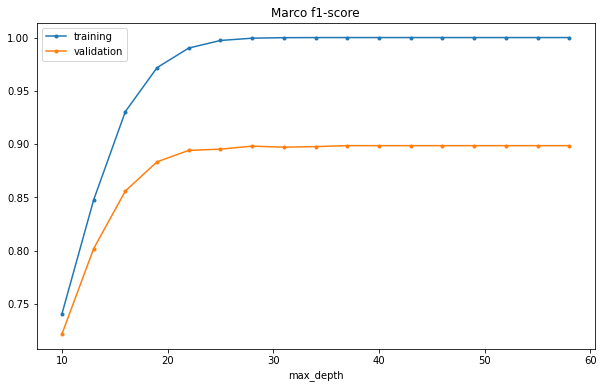

In [320]:
#plot the f1 socres 
plt.plot(np.arange(10,60,3),f1_score_train,marker='.',label = 'training')
plt.plot(np.arange(10,60,3),f1_score_val,marker='.',label = 'validation')
plt.legend()
plt.xlabel('max_depth')
plt.title('Marco f1-score')
plt.show()

The model at max depth 19 seems to perform the best. The gap between training score and validation score becomes bigger and slowly stablize after 19.

In [252]:
best_decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 19,random_state= 42)
best_decision_tree.fit(X_train,y_train)
pred_y_train = best_decision_tree.predict(X_train)
pred_y_val = best_decision_tree.predict(X_val)

In [253]:
print(classification_report(y_train,pred_y_train))

              precision    recall  f1-score   support

           1       0.95      0.93      0.94    135578
           2       0.95      0.97      0.96    181312
           3       0.99      0.99      0.99     22882
           4       1.00      0.97      0.99      1759
           5       0.97      0.94      0.95      6075
           6       0.99      0.98      0.98     11115
           7       0.99      0.98      0.99     13126

    accuracy                           0.96    371847
   macro avg       0.98      0.97      0.97    371847
weighted avg       0.96      0.96      0.96    371847



In [254]:
print(classification_report(y_val,pred_y_val))

              precision    recall  f1-score   support

           1       0.91      0.89      0.90     33894
           2       0.91      0.93      0.92     45328
           3       0.92      0.93      0.92      5721
           4       0.85      0.82      0.83       439
           5       0.81      0.79      0.80      1519
           6       0.88      0.86      0.87      2779
           7       0.95      0.93      0.94      3282

    accuracy                           0.91     92962
   macro avg       0.89      0.88      0.88     92962
weighted avg       0.91      0.91      0.91     92962



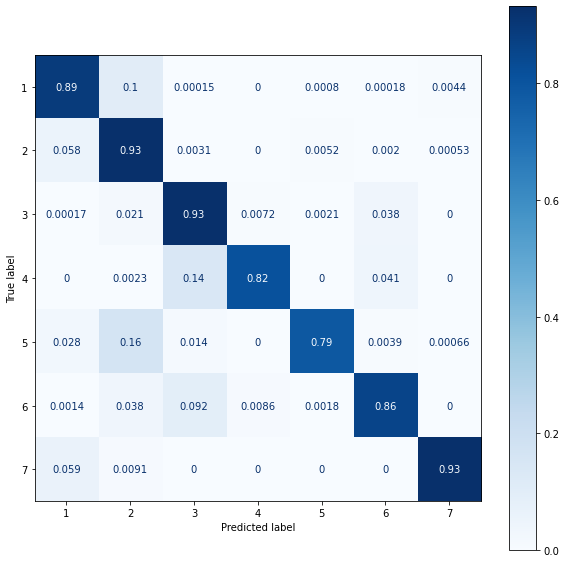

In [255]:
fig,ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(best_decision_tree,X_val,y_val,cmap=plt.cm.Blues,ax = ax,normalize = 'true')
plt.show()

The decision tree with max depth 19 has a great improvment comprehensively on both of the training set of validation set. Compared to the one with max depth 10, the accuracy, macro average f1_score, and weighted average f1_score on the validation set have improved by 11%, 18% and 10%, respectively. In particular, the model has successfully learned more difference between the majorities and minorities. Far less samples belonging to class 4 and 5 are misclassified, given  recalls of these two classes rising by 46% and 43%.

## Random Forest Model

In [257]:
#fit a random forest model with default values
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)

pred_y_train = random_forest.predict(X_train)
pred_y_val = random_forest.predict(X_val)

In [258]:
print(classification_report(y_train,pred_y_train))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00    135578
           2       1.00      1.00      1.00    181312
           3       1.00      1.00      1.00     22882
           4       1.00      1.00      1.00      1759
           5       1.00      1.00      1.00      6075
           6       1.00      1.00      1.00     11115
           7       1.00      1.00      1.00     13126

    accuracy                           1.00    371847
   macro avg       1.00      1.00      1.00    371847
weighted avg       1.00      1.00      1.00    371847



In [259]:
print(classification_report(y_val,pred_y_val))

              precision    recall  f1-score   support

           1       0.96      0.94      0.95     33894
           2       0.94      0.97      0.96     45328
           3       0.94      0.96      0.95      5721
           4       0.91      0.85      0.88       439
           5       0.91      0.75      0.82      1519
           6       0.92      0.89      0.91      2779
           7       0.97      0.94      0.96      3282

    accuracy                           0.95     92962
   macro avg       0.94      0.90      0.92     92962
weighted avg       0.95      0.95      0.95     92962



The random forest model seems overfitting, but it captures more variance over different forest cover types. It might be a good candidate with optimal paramters. 

### Hyperparameter Tuning for The Random Forest Model

In [310]:
params = {'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 100,num = 6)],
          'max_depth' : [14,17,19,22,25]}
         

#append the training set and validation set in order to adapt for the RandomForestClassifier
#our validaiton set is predefined and we don't want RandomForestClassifier validate using our training set
X_train_val = X_train.append(X_val)
y_train_val = y_train.append(y_val)

#set the index of the predefined set to 0, so the RandomizedSearchCV will not train on the predefined validation set
predefined_folds = np.zeros(X_train_val.shape[0])
#set the index of the training set to -1
predefined_folds[:X_train.shape[0]] = -1
pfs = PredefinedSplit(test_fold = predefined_folds) 
  
    

####Hyperparameter Tuning by randomizedd search
random_forest = RandomForestClassifier(criterion = 'entropy',
                                       max_depth = 19,
                                       random_state = 42)

rs1 = GridSearchCV(estimator = random_forest,
                        param_grid = params,
                        scoring='f1_micro',
                        cv = pfs,
                        verbose= 10,
                        n_jobs= -1)

rs1.fit(X_train_val,y_train_val)
rs1.best_params_


Fitting 1 folds for each of 30 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 31.7min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 33.5min finished


{'max_depth': 25, 'n_estimators': 100}

In [317]:
pd.DataFrame(rs1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,113.127481,0.0,1.523234,0.0,14,50,"{'max_depth': 14, 'n_estimators': 50}",0.860201,0.860201,0.0,30
1,138.756643,0.0,1.978857,0.0,14,60,"{'max_depth': 14, 'n_estimators': 60}",0.861244,0.861244,0.0,29
2,162.409169,0.0,2.299594,0.0,14,70,"{'max_depth': 14, 'n_estimators': 70}",0.861287,0.861287,0.0,28
3,183.792526,0.0,2.505160,0.0,14,80,"{'max_depth': 14, 'n_estimators': 80}",0.861653,0.861653,0.0,25
4,216.308945,0.0,2.836843,0.0,14,90,"{'max_depth': 14, 'n_estimators': 90}",0.861642,0.861642,0.0,26
5,245.786364,0.0,6.760501,0.0,14,100,"{'max_depth': 14, 'n_estimators': 100}",0.861416,0.861416,0.0,27
6,138.727249,0.0,1.770809,0.0,17,50,"{'max_depth': 17, 'n_estimators': 50}",0.900723,0.900723,0.0,24
7,162.886421,0.0,1.985911,0.0,17,60,"{'max_depth': 17, 'n_estimators': 60}",0.902444,0.902444,0.0,23
8,338.263797,0.0,3.142183,0.0,17,70,"{'max_depth': 17, 'n_estimators': 70}",0.903595,0.903595,0.0,19
9,435.060446,0.0,5.792599,0.0,17,80,"{'max_depth': 17, 'n_estimators': 80}",0.903401,0.903401,0.0,20


In [300]:
random_forest1 = RandomForestClassifier(criterion= 'entropy',
                                        random_state = 42,
                                        n_jobs = -1,
                                        n_estimators = 100)

#random_forest1.set_params(**rs1.best_params_)
random_forest1.fit(X_train,y_train)
pred_y_train = random_forest1.predict(X_train)
pred_y_val = random_forest1.predict(X_val)

KeyboardInterrupt: 

In [ ]:
print(classification_report(y_train,pred_y_train))

In [ ]:
print(classification_report(y_val,pred_y_val))

## 用来测试

In [ ]:
random_forest1 = RandomForestClassifier(criterion= 'entropy',
                                        random_state = 42,
                                        n_jobs = -1)

random_forest1.set_params(**rs.best_params_)
random_forest1.fit(X_train,y_train)
pred_y_train = random_forest1.predict(X_train)
pred_y_val = random_forest1.predict(X_val)

print(classification_report(y_train,pred_y_train))
print(classification_report(y_train,pred_y_train))

## 避免Overfitting

In [235]:
params = {'max_features': ['sqrt','log2'],
          'min_samples_split': [int(x) for x in np.linspace(start = 10, stop = 40, num = 5)]}

####Hyperparameter Tuning by randomizedd search
random_forest = RandomForestClassifier(criterion = 'entropy',
                                       n_estimators =  94, 
                                       max_depth = 23,
                                       random_state = 42)
          
rs = GridSearchCV(estimator = random_forest,
                       param_grid = params,
                        scoring='f1_micro',
                        cv= pfs,
                        verbose= 10,
                        n_jobs= -1)

rs.fit(X_train_val,y_train_val)
rs.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 50.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 58.4min finished


{'max_features': 'sqrt', 'min_samples_split': 10}

In [243]:
random_forest2 = RandomForestClassifier(criterion = 'entropy',
                                        n_estimators = 138,
                                        max_depth = 22,
                                        random_state = 42,
                                        max_features ='sqrt',
                                        min_samples_split = 10)


random_forest2.fit(X_train,y_train)

pred_y_train = random_forest2.predict(X_train)
pred_y_val = random_forest2.predict(X_val)

In [244]:
print(classification_report(y_train,pred_y_train))

              precision    recall  f1-score   support

           1       0.99      0.96      0.98    135578
           2       0.97      0.99      0.98    181312
           3       0.99      0.99      0.99     22882
           4       0.97      0.94      0.96      1759
           5       0.99      0.90      0.94      6075
           6       0.98      0.98      0.98     11115
           7       0.99      0.98      0.99     13126

    accuracy                           0.98    371847
   macro avg       0.98      0.96      0.97    371847
weighted avg       0.98      0.98      0.98    371847



In [245]:
print(classification_report(y_val,pred_y_val))

              precision    recall  f1-score   support

           1       0.95      0.91      0.93     33894
           2       0.93      0.96      0.94     45328
           3       0.93      0.95      0.94      5721
           4       0.90      0.83      0.86       439
           5       0.91      0.71      0.80      1519
           6       0.91      0.88      0.89      2779
           7       0.97      0.93      0.95      3282

    accuracy                           0.94     92962
   macro avg       0.93      0.88      0.90     92962
weighted avg       0.94      0.94      0.93     92962



In [ ]:
params = {'min_sample_leaf': [int(x) for x in np.linspace(start = 10, stop = 50, num = 5)]}
                

#append the training set and validation set in order to adapt for the RandomForestClassifier
#our validaiton set is predefined and we don't want RandomForestClassifier validate using our training set
X_train_val = X_train.append(X_val)
y_train_val = y_train.append(y_val)

#set the index of the predefined set to 0, so the RandomizedSearchCV will not train on the predefined validation set
predefined_folds = np.zeros(X_train_val.shape[0])
#set the index of the training set to -1
predefined_folds[:X_train.shape[0]] = sample(([1,2,3,4] * (X_train.shape[0] // 4)) + [1,2,3],(X_train.shape[0]))

pfs = PredefinedSplit(test_fold = predefined_folds) 
  
    

####Hyperparameter Tuning by randomizedd search
random_forest = RandomForestClassifier(random_state = 42,
                                       criterion = 'entropy',
                                       n_estimators = 100,
                                       max_depth = 39)
          
rs = GridSearchCV(estimator = random_forest,
                       param_grid = params,
                        scoring='f1_micro',
                        cv= pfs,
                        verbose= 10,
                        n_jobs= -1)

rs.fit(X_train_val,y_train_val)
rs.best_params_

In [232]:
random_forest3 = RandomForestClassifier()
random_forest3.set_params(criterion = 'entropy',n_estimators = 100,
                          max_depth = 39,random_state = 42,min_samples_split = 30)
random_forest3.fit(X_train,y_train)
pred_y_train = random_forest3.predict(X_train)
pred_y_val = random_forest3.predict(X_val)

In [233]:
print(classification_report(y_train,pred_y_train))
print(classification_report(y_val,pred_y_val))


              precision    recall  f1-score   support

           1       0.98      0.96      0.97    135578
           2       0.96      0.98      0.97    181312
           3       0.95      0.97      0.96     22882
           4       0.93      0.86      0.89      1759
           5       0.97      0.75      0.85      6075
           6       0.95      0.91      0.93     11115
           7       0.98      0.95      0.97     13126

    accuracy                           0.96    371847
   macro avg       0.96      0.91      0.93    371847
weighted avg       0.97      0.96      0.96    371847

              precision    recall  f1-score   support

           1       0.94      0.91      0.93     33894
           2       0.92      0.96      0.94     45328
           3       0.91      0.94      0.92      5721
           4       0.88      0.80      0.84       439
           5       0.91      0.63      0.74      1519
           6       0.89      0.83      0.86      2779
           7       0.96 

## Perform Oversampling  and Undersampling On the Data

In order to address the issue of class imblance, we perform oversampling and undersampling on the trainning set, and
keep validation set and test set intact.

In [9]:
train.Cover_Type.value_counts()

2    181312
1    135578
3     22882
7     13126
6     11115
5      6075
4      1759
Name: Cover_Type, dtype: int64

In [41]:
#set the target counts for the undersampled classes
#covtype1_count = 50000
#covtype2_count = 50000
#covtype3_count = 8000

#set the target counts for the oversampled classe
covtype4_count = 3000
covtype5_count  = 10000


#perfrom oversampling on our training data
pipe = make_pipeline(
    BorderlineSMOTE(sampling_strategy={4:covtype4_count, 5: covtype5_count}),
    #NearMiss(sampling_strategy={1 :covtype1_count,2:covtype2_count})
    )

X_train_res, y_train_res = pipe.fit_resample(X_train, y_train)

In [65]:
#sampled size for each class
y_train_res.value_counts()

2    181312
1    135578
3     22882
7     13126
6     11115
5     10000
4      3000
Name: Cover_Type, dtype: int64

In [46]:
#train our model on the resampled training data with our optimal hyperparamters
decision_tree_res = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth= 19,random_state = 42)
decision_tree_res.fit(X_train_res,y_train_res)

pred_y_train = decision_tree_res.predict(X_train)
pred_y_val = decision_tree_res.predict(X_val)

In [48]:
print(classification_report(y_train,pred_y_train))

              precision    recall  f1-score   support

           1       0.95      0.94      0.95    135578
           2       0.96      0.96      0.96    181312
           3       0.99      0.99      0.99     22882
           4       0.99      0.99      0.99      1759
           5       0.93      0.97      0.95      6075
           6       0.97      0.99      0.98     11115
           7       0.99      0.98      0.99     13126

    accuracy                           0.96    371847
   macro avg       0.97      0.98      0.97    371847
weighted avg       0.96      0.96      0.96    371847



In [49]:
print(classification_report(y_val,pred_y_val))

              precision    recall  f1-score   support

           1       0.91      0.90      0.90     33894
           2       0.92      0.93      0.92     45328
           3       0.93      0.92      0.93      5721
           4       0.82      0.83      0.82       439
           5       0.77      0.82      0.79      1519
           6       0.86      0.87      0.87      2779
           7       0.95      0.93      0.94      3282

    accuracy                           0.91     92962
   macro avg       0.88      0.88      0.88     92962
weighted avg       0.91      0.91      0.91     92962



Oversampleling technic does not help our model improve the ability to identify the minorities and even weakens its ability to identify majorities. The precision of class 4 is reduced by 4%. There also presents a subtle decrease in other scores across different classes.

In [60]:
random_forestd_res = RandomForestClassifier(criterion = 'entropy',
                                          random_state = 42,
                                          n_estimators = 100,
                                          max_depth = 19)
random_forestd_res.fit(X_train_res,y_train_res)
pred_y_train = random_forestd_res.predict(X_train)
pred_y_val = random_forestd_res.predict(X_val)

In [61]:
print(classification_report(y_train,pred_y_train))

              precision    recall  f1-score   support

           1       0.98      0.94      0.96    135578
           2       0.96      0.99      0.97    181312
           3       1.00      1.00      1.00     22882
           4       1.00      1.00      1.00      1759
           5       0.99      0.96      0.98      6075
           6       0.99      0.99      0.99     11115
           7       1.00      0.98      0.99     13126

    accuracy                           0.97    371847
   macro avg       0.99      0.98      0.98    371847
weighted avg       0.97      0.97      0.97    371847



In [62]:
print(classification_report(y_val,pred_y_val))

              precision    recall  f1-score   support

           1       0.94      0.89      0.92     33894
           2       0.91      0.95      0.93     45328
           3       0.93      0.95      0.94      5721
           4       0.88      0.88      0.88       439
           5       0.87      0.79      0.83      1519
           6       0.91      0.88      0.89      2779
           7       0.97      0.93      0.95      3282

    accuracy                           0.93     92962
   macro avg       0.92      0.90      0.91     92962
weighted avg       0.93      0.93      0.93     92962



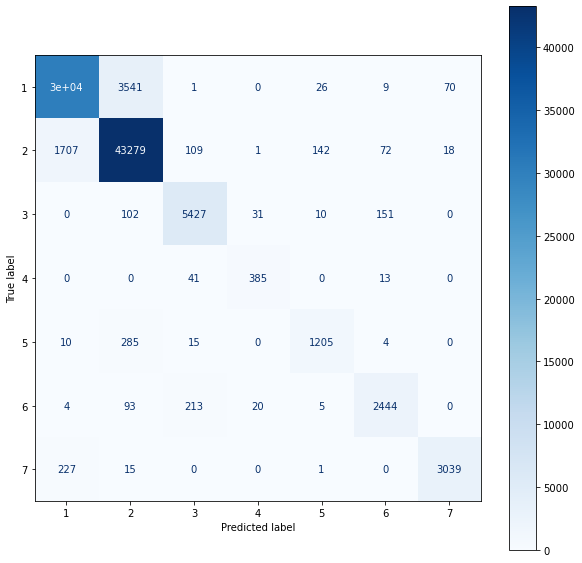

In [64]:
fig,ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(random_forestd_res,X_val,y_val,cmap=plt.cm.Blues,ax = ax)
plt.show()